In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !pip install skl2onnx

In [2]:
# !pip install onnxruntime

# Download Model

In [9]:
# wget https://www.cntk.ai/OnnxModels/mnist/opset_7/mnist.tar.gz

## Model Zoo

In [7]:
import cv2
import numpy as np
import onnxruntime
import os

# Model directory and corrected image paths
model_dir = '/content/drive/MyDrive/ONNX/ONNX Model Zoo'  # Adjust folder if necessary
model = model_dir + '/mnist/model.onnx'  # model file
image_paths = [os.path.join(model_dir, '3.png'), os.path.join(model_dir, '7.png')]  # corrected test images

# Function to preprocess images
def preprocess_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)  # Resize to (28, 28)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = img.astype(np.float32)  # Ensure float32 type
    img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 28, 28)
    img = np.expand_dims(img, axis=0)  # Add channel dimension (1, 1, 28, 28)
    return img

# Load the ONNX model and start the inference session
session = onnxruntime.InferenceSession(model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Loop over the images and perform inference
for image_path in image_paths:
    print(f"Processing image: {image_path}")

    try:
        # Preprocess the image
        img = preprocess_image(image_path)

        # Run inference
        result = session.run([output_name], {input_name: img})

        # Get the predicted label
        prediction = int(np.argmax(np.array(result).squeeze(), axis=0))
        print(f"Predicted label for {os.path.basename(image_path)}: {prediction}")

    except FileNotFoundError as e:
        print(e)


Processing image: /content/drive/MyDrive/ONNX/ONNX Model Zoo/3.png
Predicted label for 3.png: 3
Processing image: /content/drive/MyDrive/ONNX/ONNX Model Zoo/7.png
Predicted label for 7.png: 7


Processing image: /content/drive/MyDrive/ONNX/ONNX Model Zoo/3.png
Predicted label for 3.png: 3


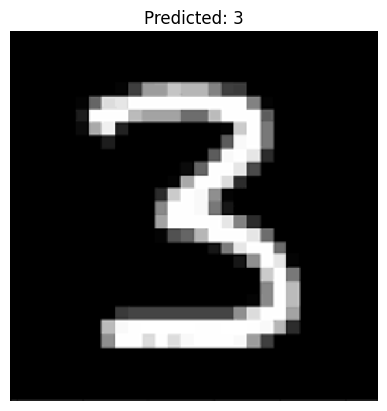

Processing image: /content/drive/MyDrive/ONNX/ONNX Model Zoo/7.png
Predicted label for 7.png: 7


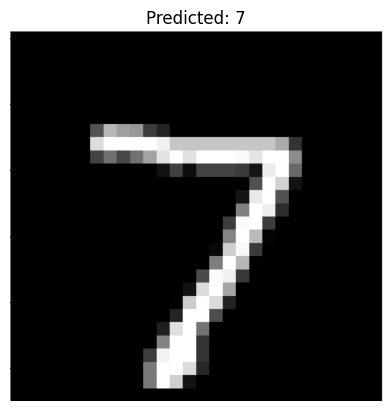

In [8]:
import cv2
import numpy as np
import onnxruntime
import os
import matplotlib.pyplot as plt

# Model directory and corrected image paths
model_dir = '/content/drive/MyDrive/ONNX/ONNX Model Zoo'  # Adjust folder if necessary
model = model_dir + '/mnist/model.onnx'  # model file
image_paths = [os.path.join(model_dir, '3.png'), os.path.join(model_dir, '7.png')]  # corrected test images

# Function to preprocess images for the model
def preprocess_image(image_path):
    img = cv2.imread(image_path)

    if img is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)  # Resize to (28, 28)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    img = img.astype(np.float32)  # Ensure float32 type
    img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 28, 28)
    img = np.expand_dims(img, axis=0)  # Add channel dimension (1, 1, 28, 28)
    return img

# Function to display the image and prediction
def display_prediction(image_path, prediction):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load original grayscale image for display
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted: {prediction}')
    plt.axis('off')  # Hide axes
    plt.show()

# Load the ONNX model and start the inference session
session = onnxruntime.InferenceSession(model, None)
input_name = session.get_inputs()[0].name
output_name = session.get_outputs()[0].name

# Loop over the images, perform inference, and visualize predictions
for image_path in image_paths:
    print(f"Processing image: {image_path}")

    try:
        # Preprocess the image
        img = preprocess_image(image_path)

        # Run inference
        result = session.run([output_name], {input_name: img})

        # Get the predicted label
        prediction = int(np.argmax(np.array(result).squeeze(), axis=0))
        print(f"Predicted label for {os.path.basename(image_path)}: {prediction}")

        # Display the image and the prediction
        display_prediction(image_path, prediction)

    except FileNotFoundError as e:
        print(e)
